In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as sp

## Task 1

In [2]:
# Read Data
data = pd.read_csv('eos.csv')
print(data.head())

   Volume (A^3/atom)  Energy (eV/atom)
0          17.935850         -2.590942
1          18.496305         -2.603892
2          19.068316         -2.610287
3          19.652000         -2.610763
4          20.247475         -2.605942


In [3]:
# Extract volume and energy data
volumes = data['Volume (A^3/atom)'].values
energies = data['Energy (eV/atom)'].values
print(volumes)
print(energies)

[17.9358498  18.49630518 19.06831595 19.652      20.24747525 20.85485962
 21.474271  ]
[-2.59094217 -2.60389181 -2.61028726 -2.61076261 -2.60594199 -2.59634389
 -2.58244712]


In [4]:
# Define the Birch–Murnaghan equation of state
def birch_murnaghan(V, a, b, c, d):
    return a + b * V**(-2/3) + c * V**(-4/3) + d * V**(-6/3)

In [5]:
# Fit the data using curve_fit
fit_params, cocvariance = sp.curve_fit(birch_murnaghan, volumes, energies)

In [6]:
# Print the fitting parameters
a_fit, b_fit, c_fit, d_fit = fit_params
print(f"Fitting parameters:a = {a_fit}, b = {b_fit}, c = {c_fit}, d = {d_fit}")

Fitting parameters:a = 2.5127732749096734, b = -61.34679633323319, c = 84.35766932957905, d = 660.3366172203022


In [7]:
# Find the equilibrium volume by minimizing the energy
result = sp.minimize_scalar(lambda V: birch_murnaghan(V, a_fit, b_fit, c_fit, d_fit), bounds=(0, 100))
equilibrium_volume = result.x
equilibrium_energy = result.fun

In [8]:
print(f"Equilibrium volume: {equilibrium_volume} A^3/atom")
print(f"Corresponding equilibrium energy: {equilibrium_energy} eV/atom")

Equilibrium volume: 19.407061797262735 A^3/atom
Corresponding equilibrium energy: -2.611244630278661 eV/atom


## Task 2

In [11]:
import matplotlib.pyplot as plt

In [12]:
# Generate a range of volumes for plotting
plot_volumes = np.linspace(min(volumes), max(volumes), 1000)

In [13]:
# Compute corresponding energies using the fitted function
plot_energies = birch_murnaghan(plot_volumes, a_fit, b_fit, c_fit, d_fit)

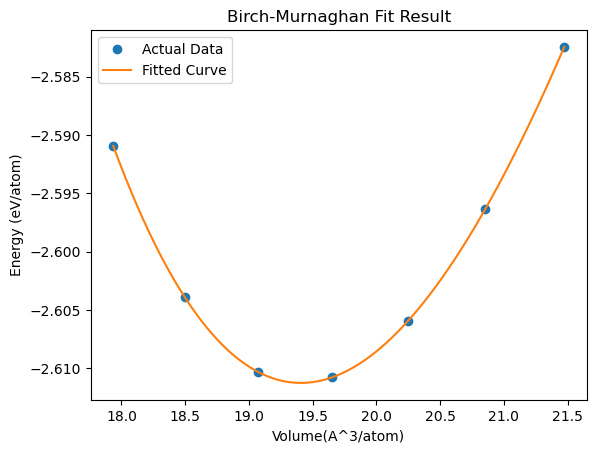

In [14]:
# Plot energy-volume curve
plt.plot(volumes, energies, 'o', label='Actual Data')
plt.plot(plot_volumes, plot_energies, '-', label='Fitted Curve')
plt.xlabel('Volume(A^3/atom)')
plt.ylabel('Energy (eV/atom)')
plt.legend()
plt.title('Birch-Murnaghan Fit Result')
plt.show()
